In [78]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
# Loading the dataset
iris = datasets.load_iris()

In [110]:
# Exploring the data
print(f"Type of iris: {type(iris)}")
print(f"Keys: {iris.keys()}")
print(f"Type of data and target {type(iris.data), type(iris.target)}")
print(f"Shape of data and target: {iris.data.shape, iris.target.shape}")
print(f"Target Names: {iris.target_names}")

Type of iris: <class 'sklearn.utils.Bunch'>
Keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Type of data and target (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
Shape of data and target: ((150, 4), (150,))
Target Names: ['setosa' 'versicolor' 'virginica']


In [111]:
# Initialising variables
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


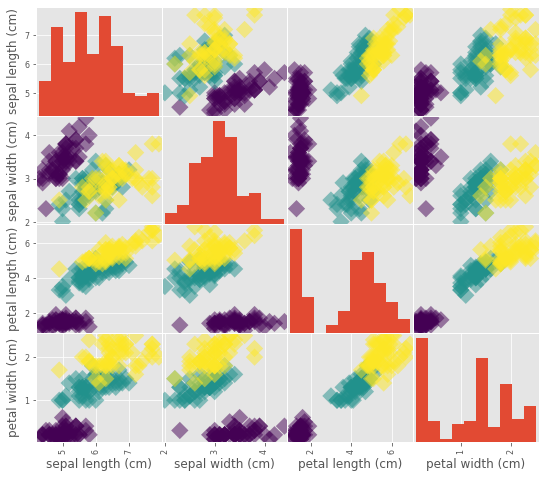

In [114]:
# Plotting a scatter matrix
pd.plotting.scatter_matrix(df, c = y, figsize = [9,8], s = 150, marker = "D")
plt.show()

In [115]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [89]:
# Checking for the best n_neighbors value through tial and error
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Looping over different values of k
for i, k in enumerate(neighbors):
    # Setting up a k-NN Classifier with k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fitting the classifier to the training data
    knn.fit(X_train, y_train)

    # Computing accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Computing accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

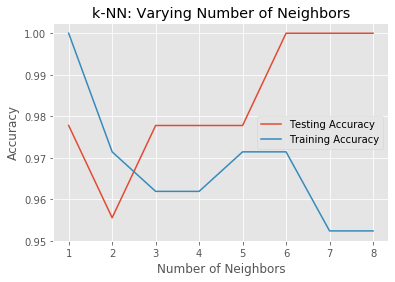

In [90]:
# Generating plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### Inference
* From the above graph it can bee seen that the accuracy score is high for n_neighbors=1 and n_neighbors=6
* Inorder to improve the chances of getting a better model with an efficient n_neighbors, Hyperparameter tuning can be done.

In [118]:
# Setup the hyperparameter grid)
leaf_size = list(range(1,50))
n_neighbors = list(range(1,9))
p=[1,2]
hyper_parameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Instantiate a KNN classifier: knn
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object: knn_cv
knn_cv = GridSearchCV(knn, hyper_parameters, cv= 5)

# Fit it to the data
knn_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
print("Best score is {}".format(knn_cv.best_score_))

Tuned KNN Parameters: {'leaf_size': 1, 'n_neighbors': 6, 'p': 2}
Best score is 0.98


### Inference
* From GridSearch, it can be seen that the best number of leaf_size = 1, the optimal distance method is Manhattan or p = 2 and the most optimal n_neighbors = 6

In [97]:
# Setting up a k-NN Classifier with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Generating the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [92]:
# Computing 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knn, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Average 5-Fold CV Score: 0.96


In [105]:
# Setting up a k-NN Classifier with n_neighbors=6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Generating the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [95]:
# Computing 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knn, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.96666667 1.         0.96666667 0.96666667 1.        ]
Average 5-Fold CV Score: 0.9800000000000001


### Inference
* It can be seen that once cross validation is conducted, the model with n_neighbors = 6 chosen after hyperparameter gives a better CV score.